In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import sklearn 
import numpy as np

In [2]:
os.getcwd()

'/Users/syedmeesumalizaidi'

In [3]:
df = pd.read_csv("final_data_with_slopes.csv")

In [4]:
df.head()

,Unnamed: 0,ALP_first,ALP_last,ALP_max,ALP_med,ALP_min,ALP_mode,ALP_slope,ALP_std,ALT_first,...,pH_med,pH_min,pH_mode,pH_slope,pH_std,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,0,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,...,7.39,7.32,7.39,0.000124,0.043012,15,3,3,-1,0
1,1,46.0,46.0,46.0,46.0,46.0,46.0,0.589744,7.567722,34.0,...,7.43,7.39,7.41,0.000464,0.040311,10,5,7,-1,0
2,2,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,...,7.35,7.29,7.34,0.000206,0.037001,18,7,5,-1,0
3,3,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,...,7.39,7.32,7.39,0.000124,0.043012,6,2,14,-1,0
4,4,79.0,78.0,80.5,78.0,75.0,78.0,0.113020,7.567722,31.0,...,7.39,7.32,7.39,0.000124,0.043012,7,3,15,-1,0


In [5]:
df = df.drop(columns=['Height_last','Height_max','Height_med','Height_min','Height_mode','Height_slope','Height_std',
'Gender_last','Gender_max','Gender_med','Gender_min','Gender_mode','Gender_slope','Gender_std',
'Age_last','Age_max','Age_med','Age_min','Age_mode','Age_slope','Age_std','Unnamed: 0',
'SAPS-I','SOFA','Length_of_stay','Survival','ICUType_first','ICUType_last','ICUType_max','ICUType_med','ICUType_min','ICUType_mode','ICUType_slope','ICUType_std'])

In [7]:
record_col = df["RecordID"]
df = df.drop(columns=['RecordID'])

KeyError: 'RecordID'

In [8]:
target_col = df["In-hospital_death"]
df = df.drop(columns=['In-hospital_death'])

In [17]:
# Create correlation matrix
corr_matrix = df.corr().abs()

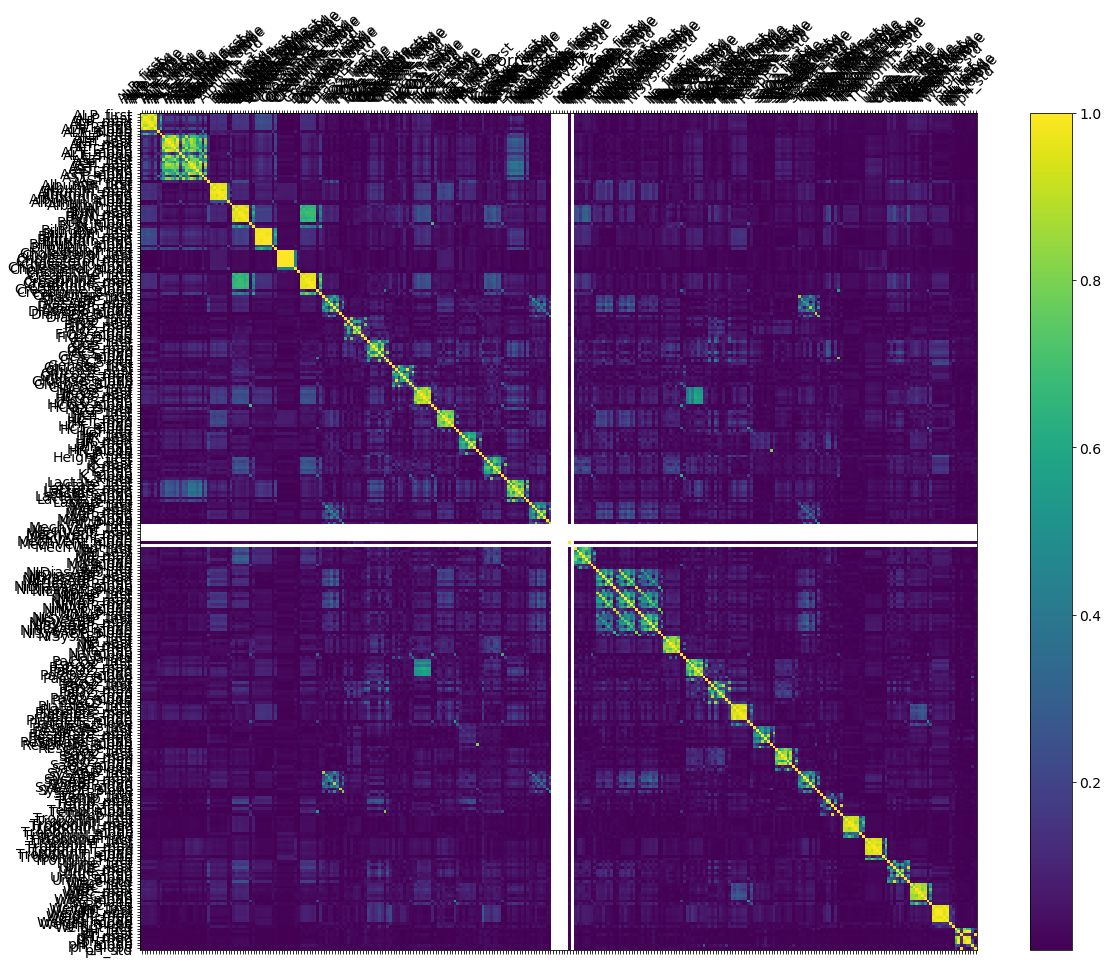

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

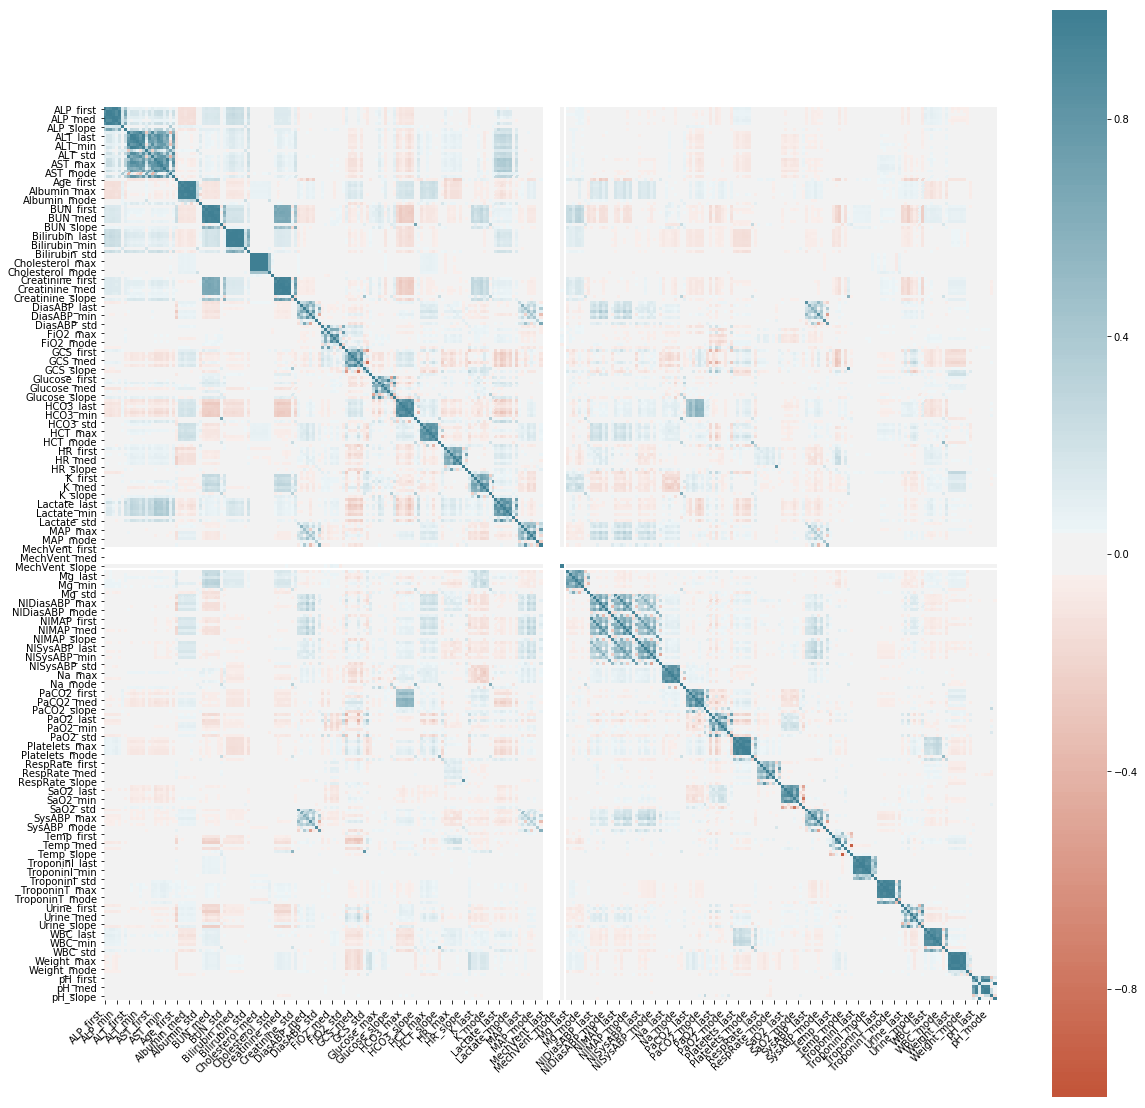

In [16]:
f = plt.figure(figsize=(20, 20))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("corr_mat.png")

In [18]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [19]:
len(df.columns)

299

In [20]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [22]:
to_drop

['ALP_max',
 'ALP_med',
 'ALP_min',
 'ALP_mode',
 'ALT_max',
 'ALT_mode',
 'AST_mode',
 'Albumin_max',
 'Albumin_med',
 'Albumin_min',
 'Albumin_mode',
 'BUN_max',
 'BUN_med',
 'BUN_min',
 'BUN_mode',
 'Bilirubin_last',
 'Bilirubin_max',
 'Bilirubin_med',
 'Bilirubin_min',
 'Bilirubin_mode',
 'Cholesterol_last',
 'Cholesterol_max',
 'Cholesterol_med',
 'Cholesterol_min',
 'Cholesterol_mode',
 'Creatinine_max',
 'Creatinine_med',
 'Creatinine_min',
 'Creatinine_mode',
 'Glucose_mode',
 'Platelets_max',
 'Platelets_med',
 'Platelets_min',
 'Platelets_mode',
 'TroponinI_med',
 'TroponinT_max',
 'TroponinT_med',
 'TroponinT_min',
 'TroponinT_mode',
 'Weight_max',
 'Weight_med',
 'Weight_min',
 'Weight_mode',
 'pH_min',
 'pH_mode',
 'pH_std']

In [23]:
# Drop features 
df = df.drop(df[to_drop], axis=1)

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03987781387900213, tolerance: 0.038022468749999955
  tol, rng, random, positive)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04850951162728734, tolerance: 0.038022468749999955
  tol, rng, random, positive)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.047375779863386924, tolerance: 0.038022468749999955
  tol, rng, random, positive)


Best alpha using built-in LassoCV: 0.047394
Best score using built-in LassoCV: 0.217437
Lasso picked 59 variables and eliminated the other 194 variables


Index(['GCS_last', 'PaCO2_first', 'ALP_std', 'Glucose_std', 'NIDiasABP_mode',
       'NIMAP_mode', 'NIMAP_last', 'Weight_last', 'NISysABP_last',
       'SysABP_max', 'DiasABP_last', 'PaO2_med', 'Glucose_min', 'PaO2_max',
       'MAP_min', 'Platelets_first', 'ALT_min', 'Height_first', 'MAP_last',
       'BUN_first', 'ALT_last', 'NIDiasABP_last', 'AST_first', 'NISysABP_min',
       'SysABP_last', 'PaO2_first', 'AST_med', 'PaO2_last', 'Urine_last',
       'Urine_min', 'Urine_max', 'NIDiasABP_med', 'Cholesterol_first',
       'AST_std', 'Urine_first', 'AST_last', 'AST_max', 'ALT_med',
       'Urine_mode', 'NISysABP_med', 'MAP_mode', 'Platelets_last', 'ALT_first',
       'PaO2_std', 'AST_min', 'SysABP_first', 'PaO2_min', 'pH_max',
       'MAP_first', 'PaO2_mode', 'Glucose_max', 'ALP_last', 'Glucose_last',
       'HR_last', 'HR_max', 'WBC_last', 'Age_first', 'BUN_last',
       'Bilirubin_first'],
      dtype='object')

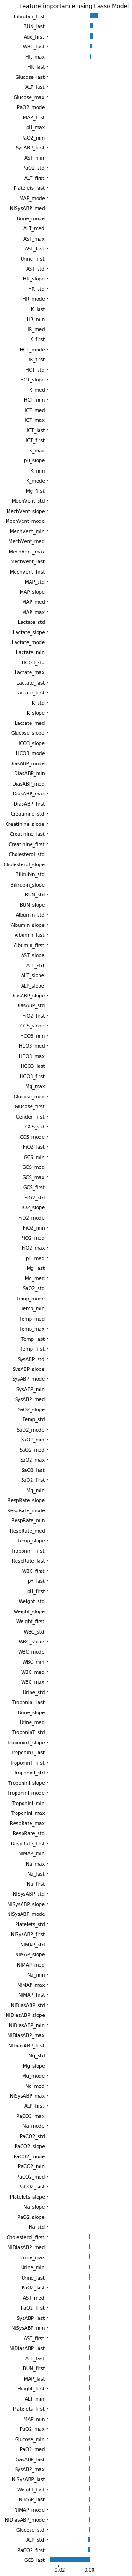

In [29]:
#Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV
ridgeCV = RidgeCV(cv=5)
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
# ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

# ridge_regressor.fit(df,target_col)
# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)

from sklearn.linear_model import Lasso,LassoCV
# lasso = Lasso()
lassoCV = LassoCV(cv=5)
# parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
# lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
# lassoCV_regressor = GridSearchCV(lassoCV,parameters,scoring='neg_mean_squared_error',cv=5)

# lasso_regressor.fit(df,target_col)
# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)

lassoCV.fit(df,target_col)
# RidgeCV()
print("Best alpha using built-in LassoCV: %f" % lassoCV.alpha_)
print("Best score using built-in LassoCV: %f" %lassoCV.score(df,target_col))
coef = pd.Series(lassoCV.coef_, index = df.columns)

# print("Best alpha using built-in RidgeCV: %f" % RidgeCV.alpha_)
# print("Best score using built-in RidgeCV: %f" %RidgeCV.score(df,target_col))
# coef_ridge = pd.Series(RidgeCV.coef_, index = df.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# print("Ridge picked " + str(sum(coef_ridge != 0)) + " variables and eliminated the other " +  str(sum(coef_ridge == 0)) + " variables")

imp_coef = coef.sort_values()
plt.figure(figsize=(2,100))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

selected_coefs = imp_coef[imp_coef.values != 0]

selected_coefs.index

df_new = df[selected_coefs.index.tolist()]

df_new.columns

In [30]:
len(df_new.columns.tolist())

59

In [31]:
df = df_new

In [32]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(df,target_col, test_size = 0.20, random_state = 10)

In [33]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.855


In [34]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=10)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.84875


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.865


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [37]:
GPC = GaussianProcessClassifier(1.0 * RBF(1.0))
Dtree = DecisionTreeClassifier(max_depth=6)
Rforest = RandomForestClassifier(max_depth=6, n_estimators=10)
NN = MLPClassifier(alpha=0.05, 
                   hidden_layer_sizes=(50, 100, 50),
                   activation='tanh',
                   learning_rate='constant',
                   solver='adam',
                   max_iter=1500)
# Best parameters found:
#  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
AdaBoost = AdaBoostClassifier()
QuardDisc = QuadraticDiscriminantAnalysis()

In [38]:
#import cross validation from sklearn
from sklearn.model_selection import cross_val_score

In [39]:
#GNB accuracy
scores = cross_val_score(gnb, df, target_col, cv=5)
print("GNB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GNB Accuracy: 0.84 (+/- 0.02)


In [40]:
#LinearSVC accuracy
scores = cross_val_score(svc_model, df, target_col, cv=5)
print("LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy: 0.86 (+/- 0.01)


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
#KNeighbors accuracy
scores = cross_val_score(neigh, df, target_col, cv=5)
print("KNeighbors Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNeighbors Accuracy: 0.84 (+/- 0.01)


In [42]:
#GPC accuracy
scores = cross_val_score(GPC, df, target_col, cv=5)
print("GPC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GPC Accuracy: 0.86 (+/- 0.00)


In [43]:
#Dtree accuracy
scores = cross_val_score(Dtree, df, target_col, cv=5)
print("Dtree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dtree Accuracy: 0.85 (+/- 0.01)


In [44]:
#Rforest accuracy
scores = cross_val_score(Rforest, df, target_col, cv=5)
print("Rforest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Rforest Accuracy: 0.87 (+/- 0.01)


In [45]:
#NN accuracy
scores = cross_val_score(NN, df, target_col, cv=5)
print("NN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NN Accuracy: 0.86 (+/- 0.01)


In [46]:
#AdaBoost accuracy
scores = cross_val_score(AdaBoost, df, target_col, cv=5)
print("AdaBoost Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

AdaBoost Accuracy: 0.87 (+/- 0.01)


In [47]:
#QuardDisc accuracy
scores = cross_val_score(QuardDisc, df, target_col, cv=5)
print("QuardDisc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

QuardDisc Accuracy: 0.84 (+/- 0.02)


In [48]:
#import classification report from yellowbrick
from yellowbrick.classifier import ClassificationReport

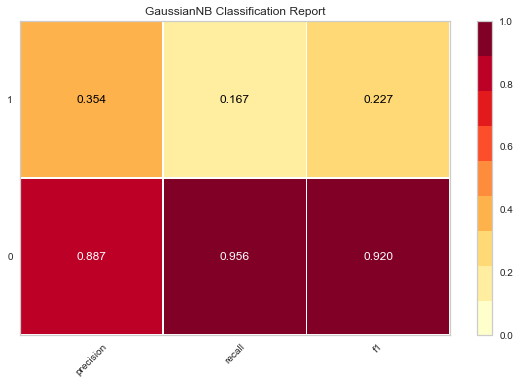

In [49]:
#GNB Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


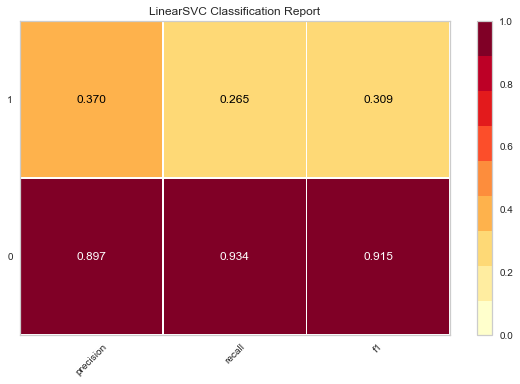

In [50]:
#LinearSVC Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

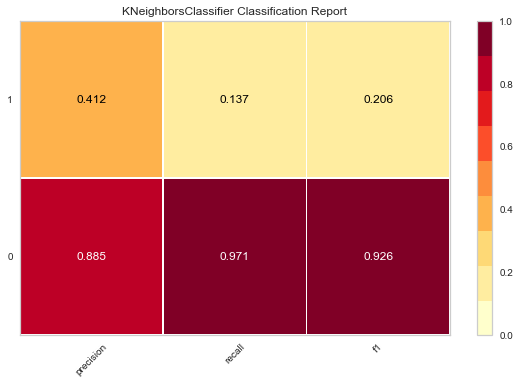

In [51]:
#KNeighbors Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


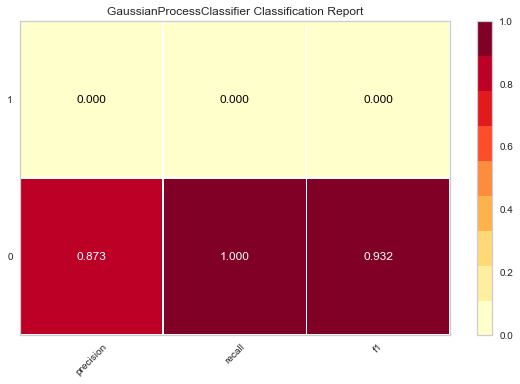

In [52]:
#GPC Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(GPC, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

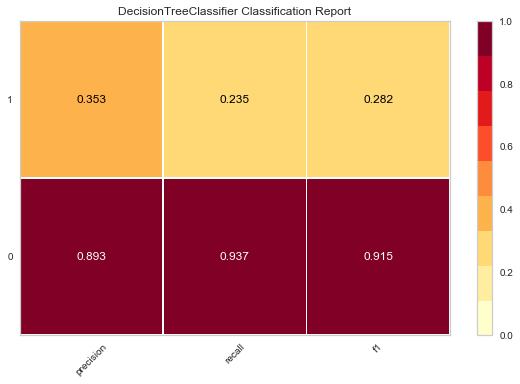

In [53]:
#Dtree Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(Dtree, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

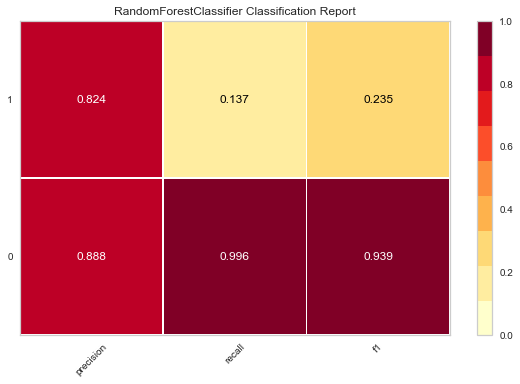

In [54]:
#Rforest Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(Rforest, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

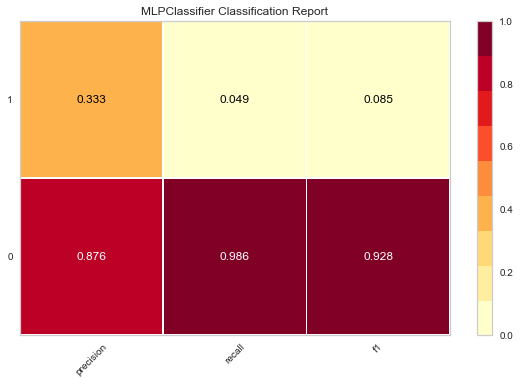

In [55]:
#NN Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(NN, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

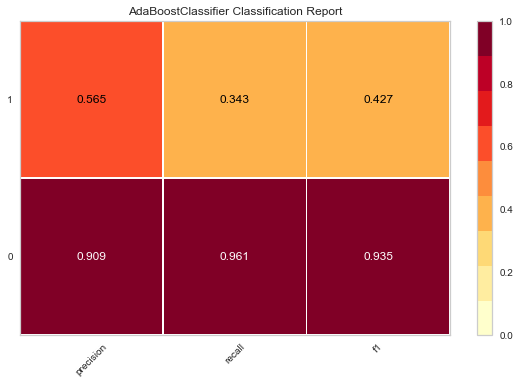

In [56]:
#AdaBoost Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(AdaBoost, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

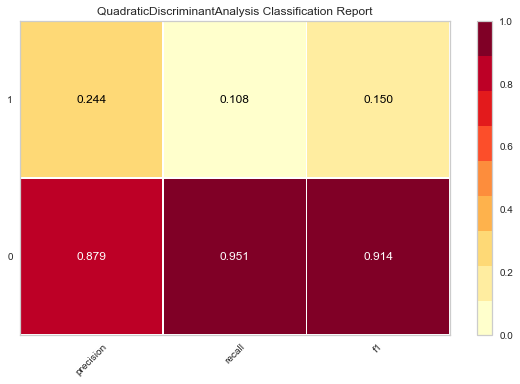

In [57]:
#QuardDisc Accuracy Visualisation
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(QuardDisc, classes=[0,1])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [199]:
concatenated_data = pd.concat([df, target_col])

In [59]:
target_col.name


'In-hospital_death'

In [64]:
def scatter_plot(feature):
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x=target_col,
                    y=df[feature],
                   hue=target_col)
#     plt.scatter(df[feature],
#                target_col,
#                c='black'
#                )
    plt.ylabel(feature)
    plt.xlabel("In-hospital_death")
    plt.show()

In [67]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [71]:
#AdaBoost accuracy
scores = cross_val_score(AdaBoost, df, target_col, cv=5, scoring='neg_mean_squared_error')
print("AdaBoost Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

AdaBoost Accuracy: -0.13 (+/- 0.01)


In [278]:
nn_tuned = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(100,100,100), (50,50,50), (50,100,50), (100,50,100), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.5, 1.0],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(nn_tuned, parameter_space, n_jobs=-3, cv=5)
clf.fit(df, target_col)

/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-3,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.5, 1.0],
                         'hidden_l

In [279]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.855 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}
0.853 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
0.844 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.861 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.859 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.858 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', '